## Healthcare Analytics (304) Project on Brain Stroke Prediction

Group-8

1. Phanindhra Garlapati - 0789117
2. Rajasekhar Gollamudi - 0794183
3. Brahma Teja Dasarraju Venkata – 0787625
4. Aravind Reddy Nagilla - 0784912

**Importing Necesssary Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression

**Loading the Dataset**

In [2]:
data = pd.read_csv('brain_stroke.csv')

**Take a look at first few records of Dataset**

In [3]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,212.0,1,1,Yes,Private,Rural,240.30,34.3,NaN,1
4,Male,NaN,1,0,NaN,Self-employed,Urban,412.12,55.2,NaN,1


## Attribute Information

From the above dataset columns are as below:

Gender - Gender of the person

Age - Age of the person

Hypertension - Whether the person is having hypertension or not ( 1 - Yes , 0 - No)

Ever_married - Whether the person is married or not (Yes or No)

Work_Type - In which work type the person is working.

Residence_type - In which residense type the person is living.

Avg_glucose_level - What is the average glucose level of the person.

BMI - What is the body mass index of the person.

Smoking_status - What is the smoking status of the person.

Stroke - Whether the person gets stroke or not. ( 1 - Yes, 0 - No)

**Knowing the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4983 non-null   object 
 1   age                4982 non-null   float64
 2   hypertension       4983 non-null   int64  
 3   heart_disease      4983 non-null   int64  
 4   ever_married       4982 non-null   object 
 5   work_type          4983 non-null   object 
 6   Residence_type     4983 non-null   object 
 7   avg_glucose_level  4983 non-null   float64
 8   bmi                4983 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4983 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.4+ KB


**From the above dataset info, we could observe that dataset is having 11 Columns and 4983 Rows in the dataset and with the evident difference in the row size there might be null values in the data set. In the next step we have to find the columns which are having null values and drop those rows.**

In [5]:
data.nunique()

gender                  2
age                   106
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3897
bmi                   343
smoking_status          4
stroke                  2
dtype: int64

From the above we could see number of unique values in each column of the dataset

Gender is having only 2 categories which are Male and Female.

In age column we are having 106 different values.

We are having only 2 categories for the columns Hypertension, Ever married, Heart disease , Stroke which are Yes and No or 1 and 0.

For Work _Type and Smoking_status we are having 4 different categories.

For BMI we are having 343 different values.

For avg_glucose_level we are having 3897 different values.

## DATA CLEANING

**Checking for Null values**

In [6]:
data.isna().sum()

gender               0
age                  1
hypertension         0
heart_disease        0
ever_married         1
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       2
stroke               0
dtype: int64

From the above result it is evident that dataset is having null values in the columns:

age - 1

ever_married  - 1

smoking_status - 2

We will remove the rows with null values

**Dropping all the null values from the data**

In [7]:
data = data.dropna()

**Again rechecking for null values in the data**

In [8]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Now the dataset is free from null values**

**Checking for the any outliers in the dataset for the columns age, bmi and avg_glucose_level**

**Boxplot for Age Column**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2cd56ba940>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2cd56d2040>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2cd56ba5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2cd56d2700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2cd56d2a00>],
 'means': []}

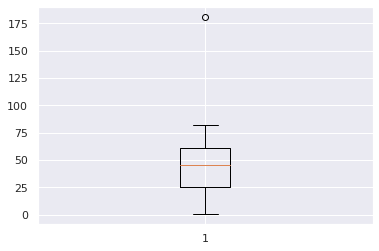

In [9]:
plt.boxplot(data["age"])

**Here we can observe that one value is completely out of Interquartile Range so we need to remove that from the dataset**

**Checking Minimun and Maximum Values for Age Column**

In [10]:
print(min(data['age']))
print(max(data['age']))

0.08
181.0


**Checking the Index of the maximum value of Age which is 181.0**

---



In [11]:
i = data.index
index = data['age'] == 181.0
result = i[index]
result.tolist()

[6]

**Index of maximum value of Age is 6**

**Dropping the row with the index 6**

In [12]:
data = data.drop(result.tolist())
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4978,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4979,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4980,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4981,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


**Calculating Z Score for bmi and avg_glucose_level columns**

In [13]:
# Z score

from scipy import stats

bmi_out = np.abs(stats.zscore(data['bmi']))
glucose_out =  np.abs(stats.zscore(data['avg_glucose_level']))


In [14]:
threshold = 3
 
# Position of the outlier

bmi_o = np.where(bmi_out > 3)
glucose_o = np.where(glucose_out > 3)

print(bmi_o)
print(glucose_o)

(array([  16, 1832, 2134]),)
(array([  26,   37,  101,  102,  110,  156,  159,  180,  202,  212,  257,
        284,  336,  491,  682,  711,  977,  980, 1020, 1111, 1274, 1325,
       1342, 1410, 1498, 2014, 2033, 2118, 2280, 2439, 2499, 2552, 2865,
       3099, 3148, 3766, 3954, 4057, 4145, 4154, 4167, 4292, 4400, 4590,
       4659, 4708, 4897, 4932, 4960]),)


In [15]:
data = data.drop([16, 1832, 2134])


In [16]:
data = data.drop([26,   37,  101,  102,  110,  156,  159,  180,  202,  212,  257,284,  336,  491,  682,  711,  977,  980, 1020, 1111, 1274, 1325,
       1342, 1410, 1498, 2014, 2033, 2118, 2280, 2439, 2499, 2552, 2865,
       3099, 3148, 3766, 3954, 4057, 4145, 4154, 4167, 4292, 4400, 4590,
       4659, 4708, 4897, 4932, 4960])

**We have got the index of outliers now we have to remove the outliers from the dataset.**

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4978,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4979,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4980,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4981,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Check if all Outliers are deleted 



In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4928 non-null   object 
 1   age                4928 non-null   float64
 2   hypertension       4928 non-null   int64  
 3   heart_disease      4928 non-null   int64  
 4   ever_married       4928 non-null   object 
 5   work_type          4928 non-null   object 
 6   Residence_type     4928 non-null   object 
 7   avg_glucose_level  4928 non-null   float64
 8   bmi                4928 non-null   float64
 9   smoking_status     4928 non-null   object 
 10  stroke             4928 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 462.0+ KB


In [19]:
data.describe(include = object).T

,count,unique,top,freq
gender,4928,2,Female,2879
ever_married,4928,2,Yes,3244
work_type,4928,4,Private,2823
Residence_type,4928,2,Urban,2505
smoking_status,4928,4,never smoked,1815


**So, After data cleaning the rows are reduced to 4928. And the data is cleaned successfully.**

## Exploratory Data Analysis (EDA)

In [20]:
data['hypertension'] = data['hypertension'].map(lambda x: 'Yes' if x == 1 else 'No')
data['hypertension'] = data['hypertension'].astype(object)
data['heart_disease'] = data['heart_disease'].map(lambda x: 'Yes' if x == 1 else 'No')
data['heart_disease'] = data['heart_disease'].astype(object)
data['stroke'] = data['stroke'].map(lambda x: 'Yes' if x == 1 else 'No')
data['stroke'] = data['stroke'].astype(object)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
5,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
7,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4978,Male,41.0,No,No,No,Private,Rural,70.15,29.8,formerly smoked,No
4979,Male,40.0,No,No,Yes,Private,Urban,191.15,31.1,smokes,No
4980,Female,45.0,Yes,No,Yes,Govt_job,Rural,95.02,31.8,smokes,No
4981,Male,40.0,No,No,Yes,Private,Rural,83.94,30.0,smokes,No


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4928 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4928 non-null   object 
 1   age                4928 non-null   float64
 2   hypertension       4928 non-null   object 
 3   heart_disease      4928 non-null   object 
 4   ever_married       4928 non-null   object 
 5   work_type          4928 non-null   object 
 6   Residence_type     4928 non-null   object 
 7   avg_glucose_level  4928 non-null   float64
 8   bmi                4928 non-null   float64
 9   smoking_status     4928 non-null   object 
 10  stroke             4928 non-null   object 
dtypes: float64(3), object(8)
memory usage: 462.0+ KB


**Co-relation between different columns in the dataset**

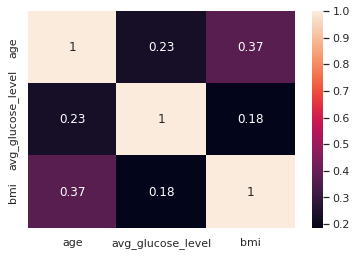

In [22]:
sns.heatmap(data.corr(), annot=True)

From the correlation matrix the insights are:

Age , Avg_glucose_level , and BMI are positively correlated.

As the Age increases Avg_glucose_level and BMI of the person is increasing.

**Who have high chance of getting brain stroke?**

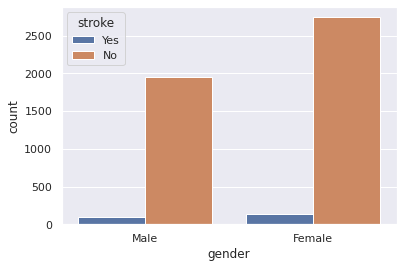

In [23]:
sns.countplot(data=data, x="gender", hue="stroke")

**From the above chart it is evident that Females are having more chance of getting brain stroke**

In [24]:
newdf = data[(data.stroke == "Yes")]
newdf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
2,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
5,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
7,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.4,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4817,Male,79.0,No,No,Yes,Private,Rural,114.77,27.2,formerly smoked,Yes
4818,Male,74.0,No,No,Yes,Private,Urban,167.13,28.7,Unknown,Yes
4819,Female,76.0,Yes,Yes,Yes,Self-employed,Urban,199.86,31.7,smokes,Yes
4820,Male,74.0,No,No,Yes,Self-employed,Rural,60.98,28.1,never smoked,Yes


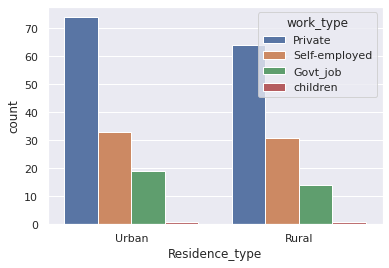

In [25]:
sns.countplot(x='Residence_type', data=newdf, hue='work_type')

Stroke risk is higher for urban residents than rural residents and its on even higher for people who are doing Private jobs

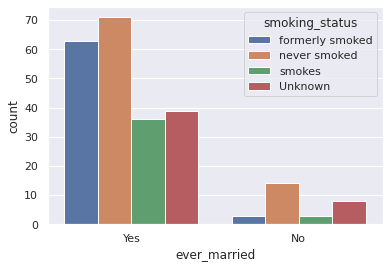

In [26]:
sns.countplot(x='ever_married', data=newdf, hue='smoking_status')

According to the findings, persons who are married and have never smoked or have quit smoking have a higher risk of developing a stroke. But those who never smoke and are single are also at risk for brain attacks.

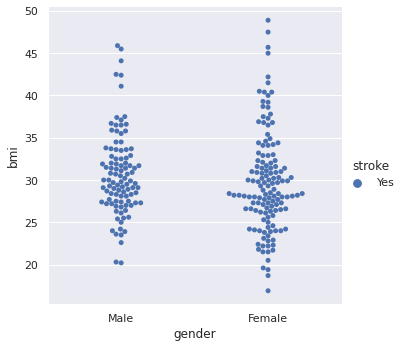

In [27]:
sns.catplot(data=newdf, x="gender", y="bmi", hue="stroke", kind="swarm")

**People those who are having BMI index 22-38 are having higher chances of brain stroke.**

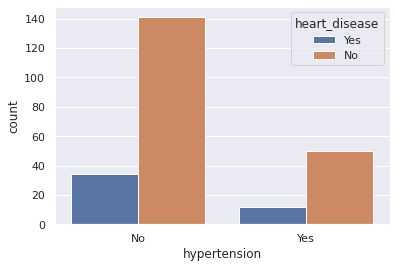

In [28]:
sns.countplot(x='hypertension', data=newdf, hue= 'heart_disease')

**Above chart depicts that heart disease and hypertension are not factors in stroke. Because persons without heart disease or high blood pressure often suffer from strokes.**

## Encoding the data

In [29]:
categorical_cols = [col for col in data.columns if data[col].dtype == "object"]
categorical_nunique = list(map(lambda col: data[col].nunique(), categorical_cols))
d = dict(zip(categorical_cols, categorical_nunique))
sorted(d.items(), key=lambda x: x[1])

[('gender', 2),
 ('hypertension', 2),
 ('heart_disease', 2),
 ('ever_married', 2),
 ('Residence_type', 2),
 ('stroke', 2),
 ('work_type', 4),
 ('smoking_status', 4)]

In [30]:
Encoder_one = OrdinalEncoder()
data[categorical_cols] =Encoder_one.fit_transform(data[categorical_cols])
abs(data.corr()['stroke']).sort_values(ascending=False)

stroke               1.000000
age                  0.242308
heart_disease        0.137153
avg_glucose_level    0.127768
hypertension         0.126653
ever_married         0.105957
bmi                  0.056004
work_type            0.040406
smoking_status       0.023227
Residence_type       0.012384
gender               0.004731
Name: stroke, dtype: float64

**Splitting the training and testing data**

In [31]:
X= data
y = data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

**Balancing the Dataset**

In [32]:
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(X, y)
y.value_counts()

1.0    4691
0.0    4691
Name: stroke, dtype: int64

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9382 entries, 0 to 9381
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9382 non-null   float64
 1   age                9382 non-null   float64
 2   hypertension       9382 non-null   float64
 3   heart_disease      9382 non-null   float64
 4   ever_married       9382 non-null   float64
 5   work_type          9382 non-null   float64
 6   Residence_type     9382 non-null   float64
 7   avg_glucose_level  9382 non-null   float64
 8   bmi                9382 non-null   float64
 9   smoking_status     9382 non-null   float64
 10  stroke             9382 non-null   float64
dtypes: float64(11)
memory usage: 806.4 KB


In [34]:
X = data.drop('stroke',axis = 1 )
y=data.stroke
sm = SMOTE(sampling_strategy='minority')
X, y = sm.fit_resample(X, y)
y.value_counts()

1.0    4691
0.0    4691
Name: stroke, dtype: int64

In [35]:
ac_v = []
f_v = []

## Decision Tree

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)

decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)
ypred_tree = decision_tree.predict(X_valid)
decision_acc =  metrics.accuracy_score(y_valid, ypred_tree)
ac_v.append(decision_acc)
print('F1-score: %.3f'%f1_score(y_valid, ypred_tree))
print('Decision tree accuracy : %.3f'%decision_acc)

F1-score: 0.947
Decision tree accuracy : 0.947


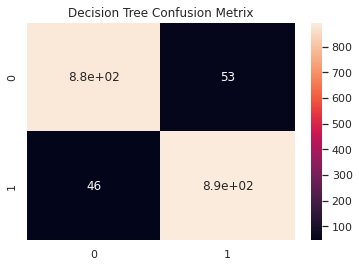

In [38]:
confusion = confusion_matrix(y_valid, ypred_tree)
plt.title('Decision Tree Confusion Metrix')
sns.heatmap(confusion, annot = True)

In [39]:
f_v.append(f1_score(y_valid, ypred_tree))
t_n = ['Stroke = 0', 'Stroke = 1']
print(classification_report(y_valid, ypred_tree, labels=[0,1], target_names=t_n))

              precision    recall  f1-score   support

  Stroke = 0       0.95      0.94      0.95       938
  Stroke = 1       0.94      0.95      0.95       939

    accuracy                           0.95      1877
   macro avg       0.95      0.95      0.95      1877
weighted avg       0.95      0.95      0.95      1877



## SUPPORT VECTOR MACHINE

In [40]:
c_svm = svm.SVC(kernel='rbf')
sv = c_svm.fit(X_train, y_train)
ypred_svm = c_svm.predict(X_valid)
s_acc = accuracy_score(y_valid, ypred_svm)
ac_v.append(s_acc)

In [41]:
print('F1-score: %.3f' %f1_score(y_valid,ypred_svm))
print('SUPPORT VECTOR MACHINE ACCURACY : %.3f' %s_acc)

F1-score: 0.795
SUPPORT VECTOR MACHINE ACCURACY : 0.781


In [42]:
f_v.append(f1_score(y_valid,ypred_svm))
t_n = ['Stroke = 0', 'Stroke = 1']

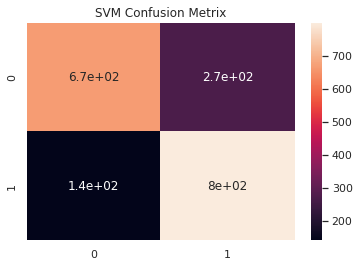

In [48]:
confusion = confusion_matrix(y_valid, ypred_svm)
plt.title('SVM Confusion Metrix')
sns.heatmap(confusion, annot = True)

In [46]:
print(classification_report(y_valid, ypred_svm, labels=[0,1],target_names=t_n))

              precision    recall  f1-score   support

  Stroke = 0       0.83      0.71      0.76       938
  Stroke = 1       0.75      0.85      0.80       939

    accuracy                           0.78      1877
   macro avg       0.79      0.78      0.78      1877
weighted avg       0.79      0.78      0.78      1877



## LOGISTIC REGRESSION

In [47]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_valid) 
yf = f1_score(y_valid,predictions)
ya = metrics.accuracy_score(y_valid,predictions)

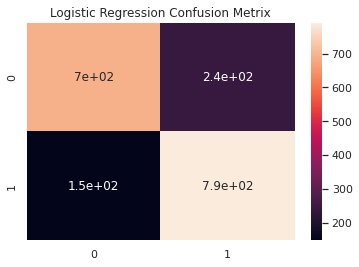

In [49]:
confusion = confusion_matrix(y_valid, predictions)
plt.title('Logistic Regression Confusion Metrix')
sns.heatmap(confusion, annot = True)

In [50]:
print('F1 Score for Logistic regression model : %.3f'%yf)
print('Accuracy : %.3f'%ya)
print("Classification Report : \n\n" , classification_report(predictions,y_valid),"\n")

F1 Score for Logistic regression model : 0.802
Accuracy : 0.792
Classification Report : 

               precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       843
         1.0       0.84      0.76      0.80      1034

    accuracy                           0.79      1877
   macro avg       0.79      0.79      0.79      1877
weighted avg       0.80      0.79      0.79      1877
 



**CONCLUSION**

After comparing and executing the best models for classification we got accuracies as follows:

DECISION TREE - 94%

SUPPORT VECTOR MACHINE - 78%

LOGISTIC REGRESSION - 79%

So, the best model to predict the brain stroke is Decision Tree